### 这个note是用来画一系列函数图像的

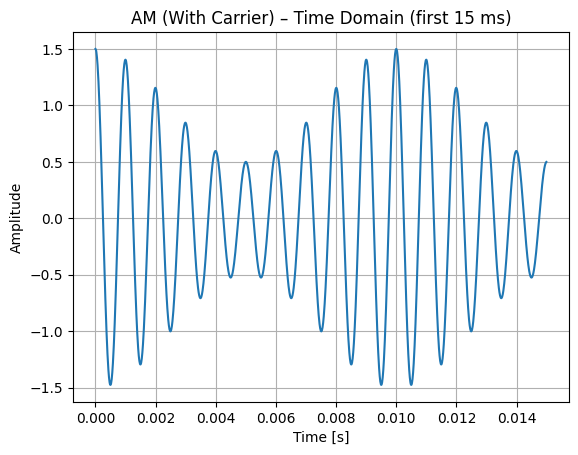

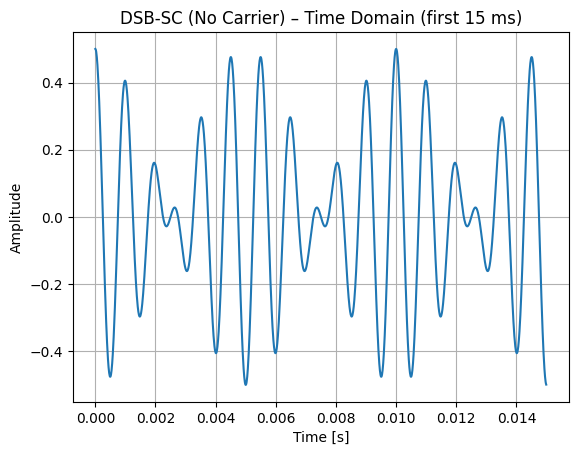

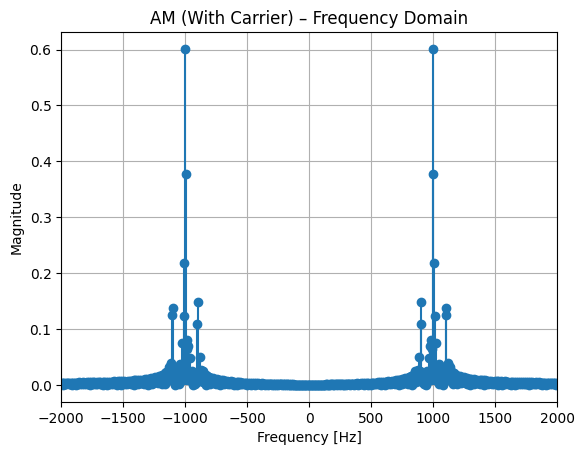

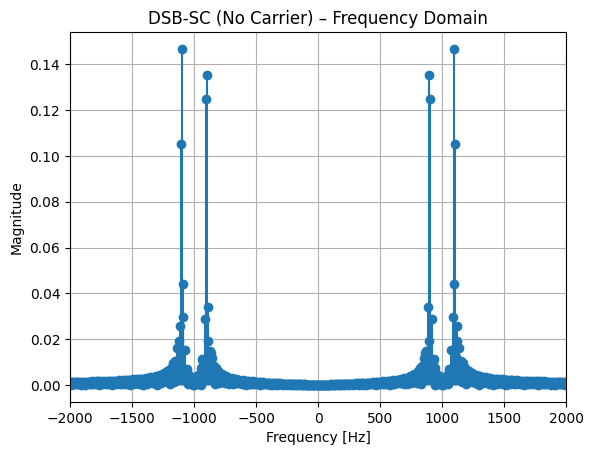

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Higher resolution parameters
fs = 100000  # 100 kHz sampling rate for good frequency resolution
T = 0.1      # 0.1 second duration => Δf = 10 Hz
t = np.arange(0, T, 1/fs)

# Signal parameters
fc = 1000   # carrier frequency 1 kHz
fm = 100    # message frequency 100 Hz
Ac = 1.0    # carrier amplitude
Am = 0.5    # message amplitude

# Baseband message
m_t = Am * np.cos(2 * np.pi * fm * t)

# AM with carrier
s_am = Ac * (1 + m_t) * np.cos(2 * np.pi * fc * t)

# DSB-SC (suppressed carrier)
s_dsb = Ac * m_t * np.cos(2 * np.pi * fc * t)

def compute_fft(signal, fs):
    # zero‑pad to next power of two for nicer display
    N = int(2 ** np.ceil(np.log2(len(signal))))
    fft_vals = np.fft.fft(signal, n=N)
    fft_freq = np.fft.fftfreq(N, 1/fs)
    fft_shifted = np.fft.fftshift(fft_vals)
    freq_shifted = np.fft.fftshift(fft_freq)
    magnitude = np.abs(fft_shifted) / (N/2)
    return freq_shifted, magnitude

freq_am, mag_am = compute_fft(s_am, fs)
freq_dsb, mag_dsb = compute_fft(s_dsb, fs)

# Helper function to focus on a window around ±fc
def plot_freq(freq, mag, title):
    plt.figure()
    plt.stem(freq, mag, basefmt=" ")
    plt.xlim(-2000, 2000)  # show ±2 kHz around carrier
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.grid(True)

# Time‑domain plots (first 15 ms for visibility)
plt.figure()
plt.plot(t[:int(0.015*fs)], s_am[:int(0.015*fs)])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("AM (With Carrier) – Time Domain (first 15 ms)")
plt.grid(True)

plt.figure()
plt.plot(t[:int(0.015*fs)], s_dsb[:int(0.015*fs)])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("DSB‑SC (No Carrier) – Time Domain (first 15 ms)")
plt.grid(True)

# Frequency‑domain plots
plot_freq(freq_am, mag_am, "AM (With Carrier) – Frequency Domain")
plot_freq(freq_dsb, mag_dsb, "DSB‑SC (No Carrier) – Frequency Domain")

plt.show()

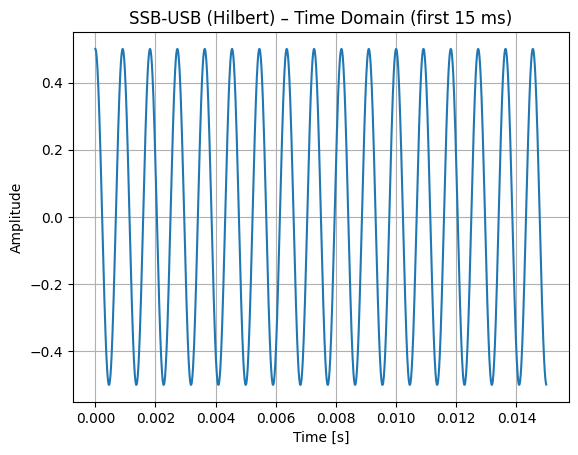

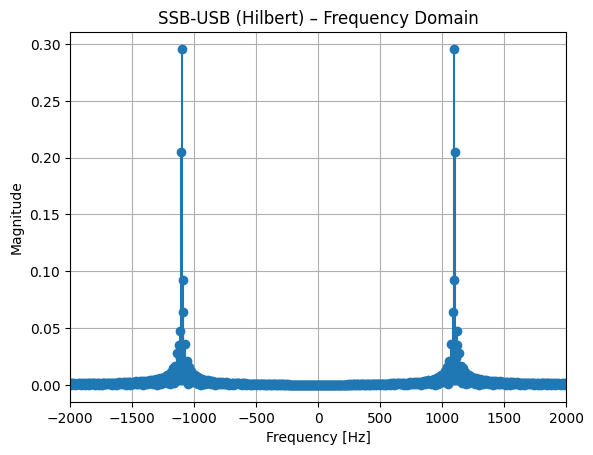

In [2]:
from scipy.signal import hilbert

# Generate SSB signal using Hilbert transform
# We'll create an upper-sideband (USB) signal.
# The analytic signal is m_a(t) = m(t) + j * m_h(t), where m_h(t) is the Hilbert transform of m(t)
# s_ssb_usb(t) = Re{ (m(t) + j * m_h(t)) * exp(j * 2 * pi * fc * t) }
# s_ssb_usb(t) = m(t) * cos(2 * pi * fc * t) - m_h(t) * sin(2 * pi * fc * t)

m_h_t = np.imag(hilbert(m_t))
s_ssb_usb = m_t * np.cos(2 * np.pi * fc * t) - m_h_t * np.sin(2 * np.pi * fc * t)

# Compute FFT for SSB signal
freq_ssb_usb, mag_ssb_usb = compute_fft(s_ssb_usb, fs)

# Time-domain plot for SSB (first 15 ms for visibility)
plt.figure()
plt.plot(t[:int(0.015*fs)], s_ssb_usb[:int(0.015*fs)])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("SSB-USB (Hilbert) – Time Domain (first 15 ms)")
plt.grid(True)

# Frequency-domain plot for SSB
plot_freq(freq_ssb_usb, mag_ssb_usb, "SSB-USB (Hilbert) – Frequency Domain")

plt.show()

C:\Users\IWMAI\AppData\Local\Temp\ipykernel_29584\1181644301.py:80: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IWMAI\AppData\Local\Temp\ipykernel_29584\1181644301.py:80: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IWMAI\AppData\Local\Temp\ipykernel_29584\1181644301.py:80: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IWMAI\AppData\Local\Temp\ipykernel_29584\1181644301.py:80: UserWarning: Glyph 35843 (\N{CJK UNIFIED IDEOGRAPH-8C03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IWMAI\AppData\Local\Temp\ipykernel_29584\1181644301.py:80: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IWMAI\AppData\Local\Temp\ipykernel_29584\1181644301.py:80: UserWarning: Glyph 29305 (\

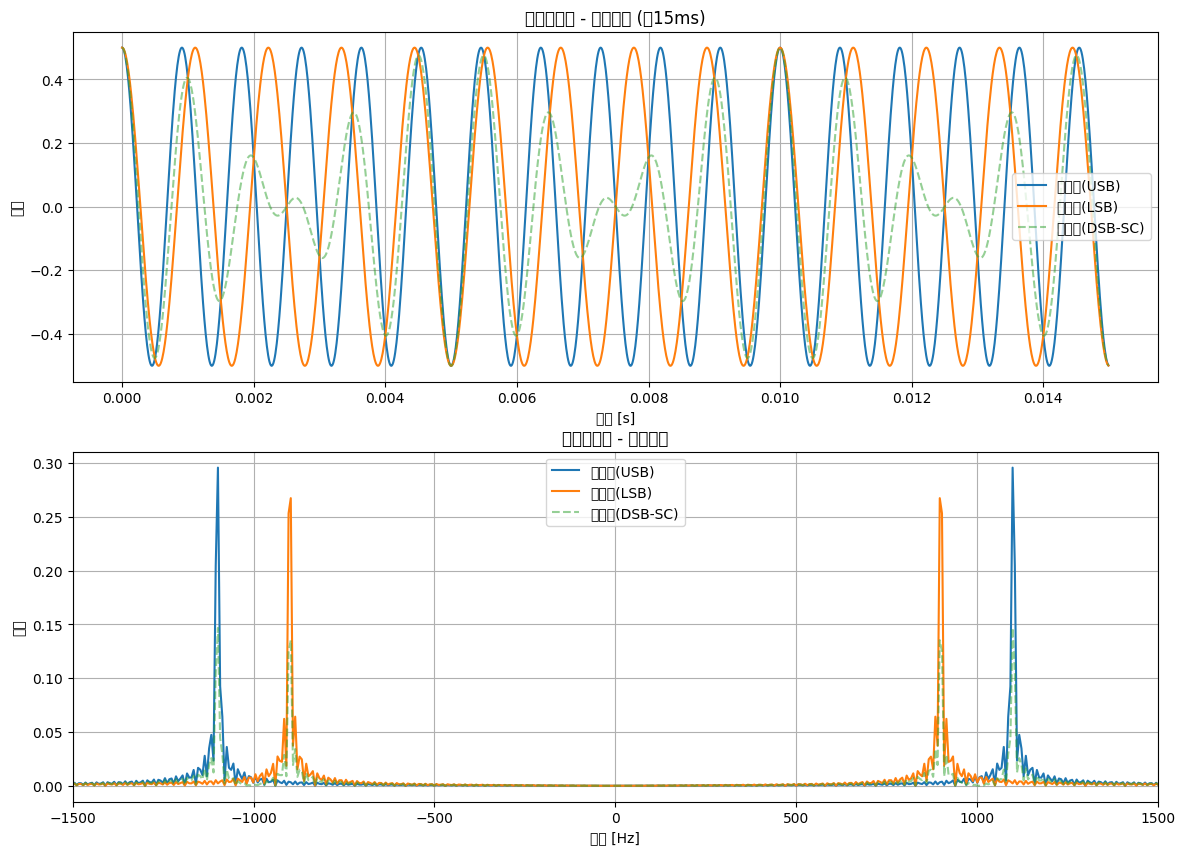

C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35889 (\N{CJK UNIFIED IDEOGRAPH-8C31}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py

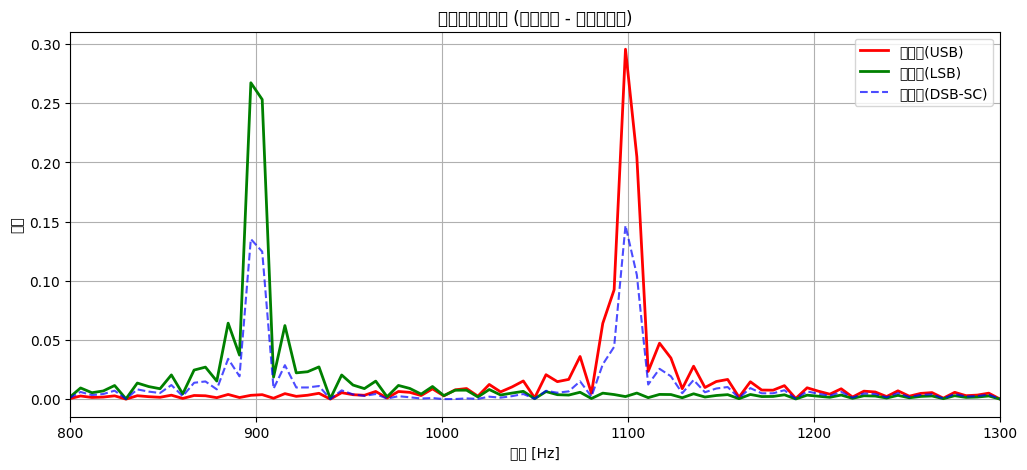

C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


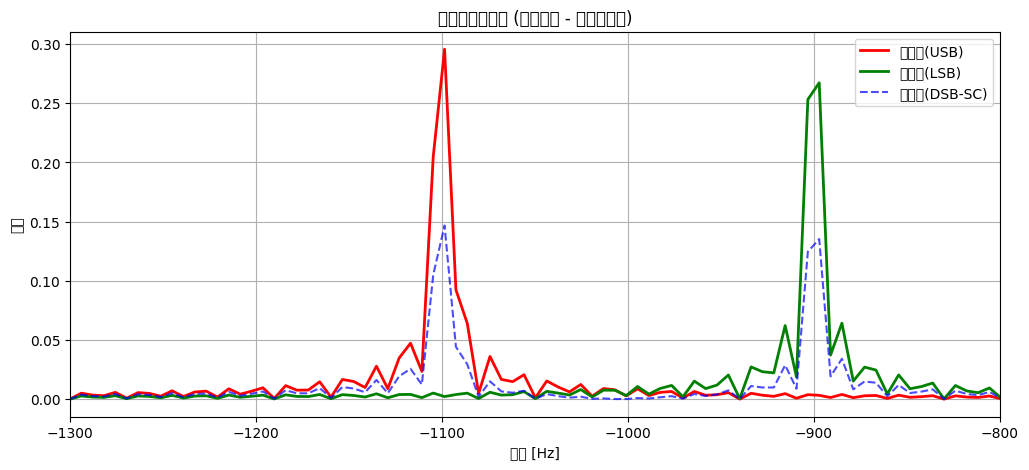

C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20445 (\N{CJK UNIFIED IDEOGRAPH-4FDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IWMAI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserW

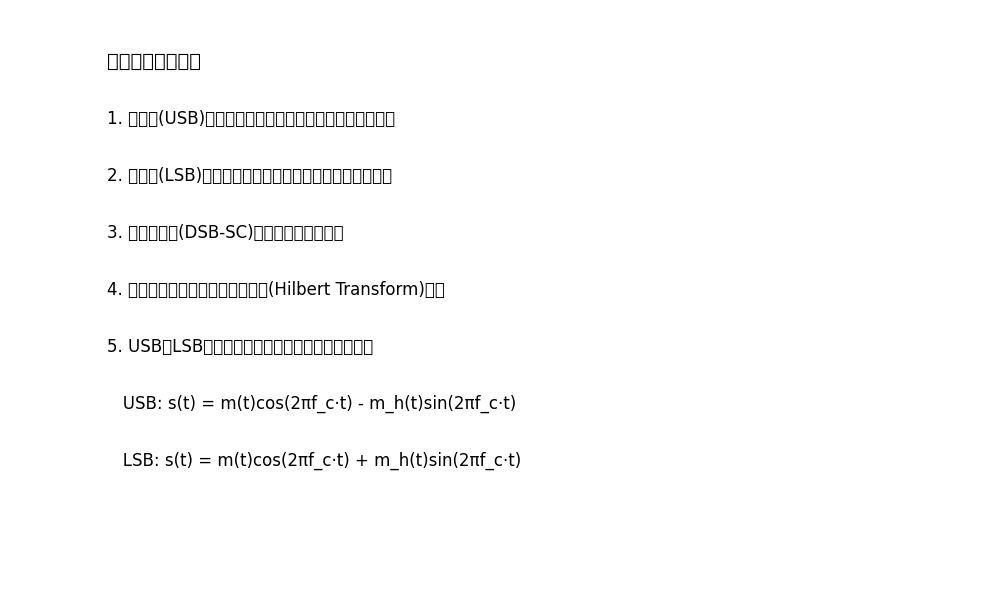

In [3]:
# 创建更明显的单边带信号比较
from scipy.signal import hilbert

# 生成标准的单边带信号 (上边带和下边带)
m_h_t = np.imag(hilbert(m_t))  # Hilbert变换

# 上边带信号 (USB)
s_ssb_usb = m_t * np.cos(2 * np.pi * fc * t) - m_h_t * np.sin(2 * np.pi * fc * t)

# 下边带信号 (LSB)
s_ssb_lsb = m_t * np.cos(2 * np.pi * fc * t) + m_h_t * np.sin(2 * np.pi * fc * t)

# 频域分析
freq_usb, mag_usb = compute_fft(s_ssb_usb, fs)
freq_lsb, mag_lsb = compute_fft(s_ssb_lsb, fs)
freq_dsb, mag_dsb = compute_fft(s_dsb, fs)  # 双边带用于比较

# 放大查看信号特征
plt.figure(figsize=(14, 10))

# 时域图形
plt.subplot(2, 1, 1)
plt.plot(t[:int(0.015*fs)], s_ssb_usb[:int(0.015*fs)], label='上边带(USB)')
plt.plot(t[:int(0.015*fs)], s_ssb_lsb[:int(0.015*fs)], label='下边带(LSB)')
plt.plot(t[:int(0.015*fs)], s_dsb[:int(0.015*fs)], '--', alpha=0.5, label='双边带(DSB-SC)')
plt.xlabel('时间 [s]')
plt.ylabel('幅度')
plt.title('单边带调制 - 时域对比 (前15ms)')
plt.grid(True)
plt.legend()

# 频域图形 - 使用线条而不是stem使频谱更加明显
plt.subplot(2, 1, 2)
plt.plot(freq_usb, mag_usb, label='上边带(USB)', linewidth=1.5)
plt.plot(freq_lsb, mag_lsb, label='下边带(LSB)', linewidth=1.5)
plt.plot(freq_dsb, mag_dsb, '--', alpha=0.5, label='双边带(DSB-SC)')
plt.xlim(-1500, 1500)  # 聚焦在载波频率附近
plt.xlabel('频率 [Hz]')
plt.ylabel('幅度')
plt.title('单边带调制 - 频域对比')
plt.grid(True)
plt.legend()

# 放大的频域图 - 只关注正频率部分
plt.figure(figsize=(12, 5))
plt.plot(freq_usb, mag_usb, 'r', label='上边带(USB)', linewidth=2)
plt.plot(freq_lsb, mag_lsb, 'g', label='下边带(LSB)', linewidth=2)
plt.plot(freq_dsb, mag_dsb, 'b--', alpha=0.7, label='双边带(DSB-SC)')
plt.xlim(800, 1300)  # 只关注载波频率fc=1000Hz附近的频谱
plt.xlabel('频率 [Hz]')
plt.ylabel('幅度')
plt.title('单边带频谱对比 (放大视图 - 正频率部分)')
plt.grid(True)
plt.legend()

# 同样放大负频率部分
plt.figure(figsize=(12, 5))
plt.plot(freq_usb, mag_usb, 'r', label='上边带(USB)', linewidth=2)
plt.plot(freq_lsb, mag_lsb, 'g', label='下边带(LSB)', linewidth=2)
plt.plot(freq_dsb, mag_dsb, 'b--', alpha=0.7, label='双边带(DSB-SC)')
plt.xlim(-1300, -800)  # 只关注-fc频率附近的频谱
plt.xlabel('频率 [Hz]')
plt.ylabel('幅度')
plt.title('单边带频谱对比 (放大视图 - 负频率部分)')
plt.grid(True)
plt.legend()

# 添加注释说明单边带特性
plt.figure(figsize=(10, 6))
plt.text(0.1, 0.9, '单边带调制特点：', fontsize=14, weight='bold')
plt.text(0.1, 0.8, '1. 上边带(USB)保留载波频率以上的频谱成分，抑制下边带', fontsize=12)
plt.text(0.1, 0.7, '2. 下边带(LSB)保留载波频率以下的频谱成分，抑制上边带', fontsize=12)
plt.text(0.1, 0.6, '3. 相比双边带(DSB-SC)，单边带节省了带宽', fontsize=12)
plt.text(0.1, 0.5, '4. 单边带信号可通过希尔伯特变换(Hilbert Transform)实现', fontsize=12)
plt.text(0.1, 0.4, '5. USB和LSB的区别在于希尔伯特变换部分的符号：', fontsize=12)
plt.text(0.1, 0.3, '   USB: s(t) = m(t)cos(2πf_c·t) - m_h(t)sin(2πf_c·t)', fontsize=12)
plt.text(0.1, 0.2, '   LSB: s(t) = m(t)cos(2πf_c·t) + m_h(t)sin(2πf_c·t)', fontsize=12)
plt.axis('off')  # 隐藏坐标轴

plt.tight_layout()
plt.show()

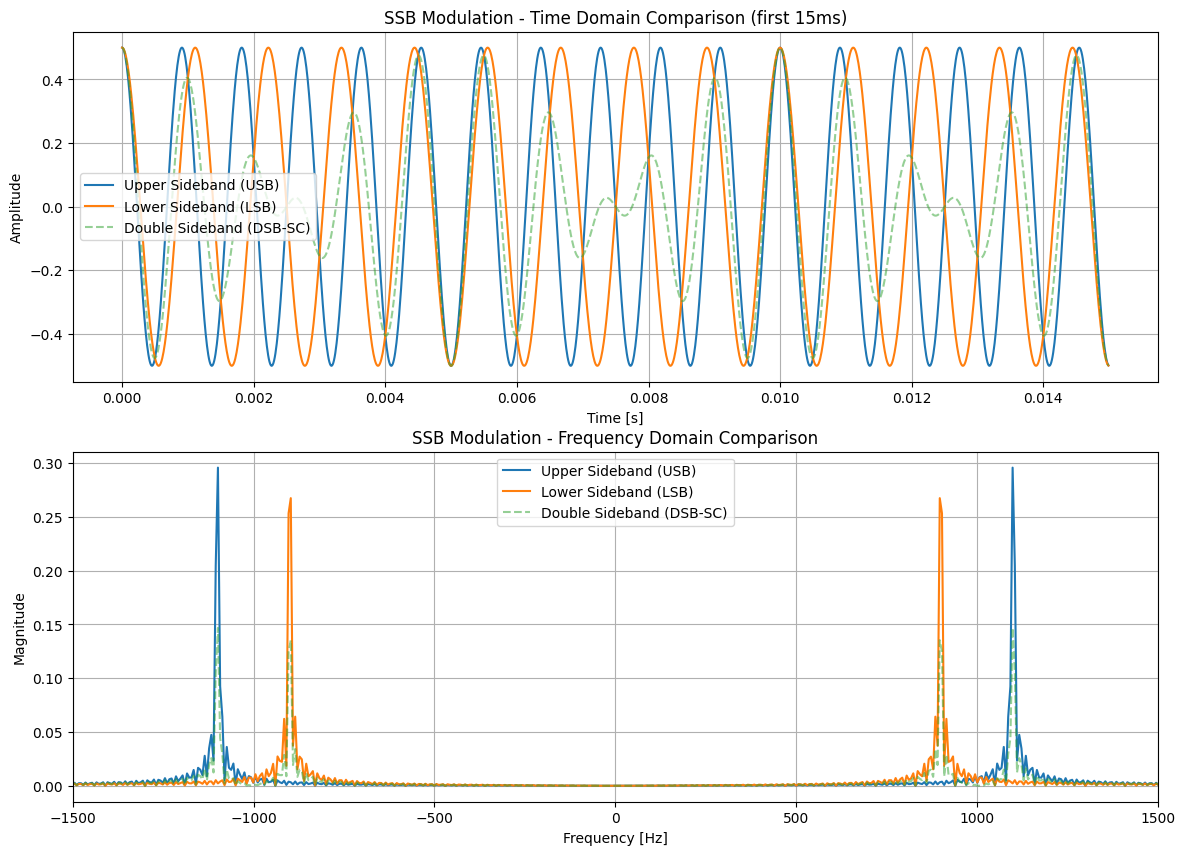

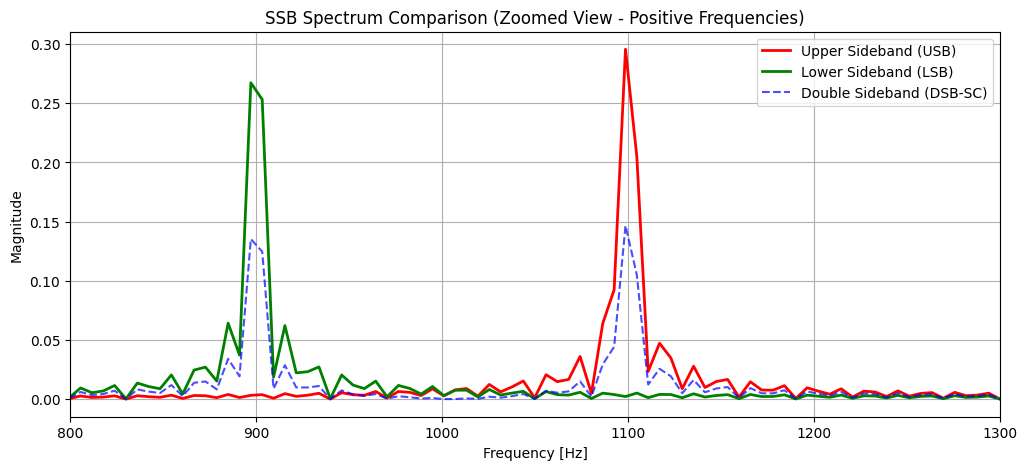

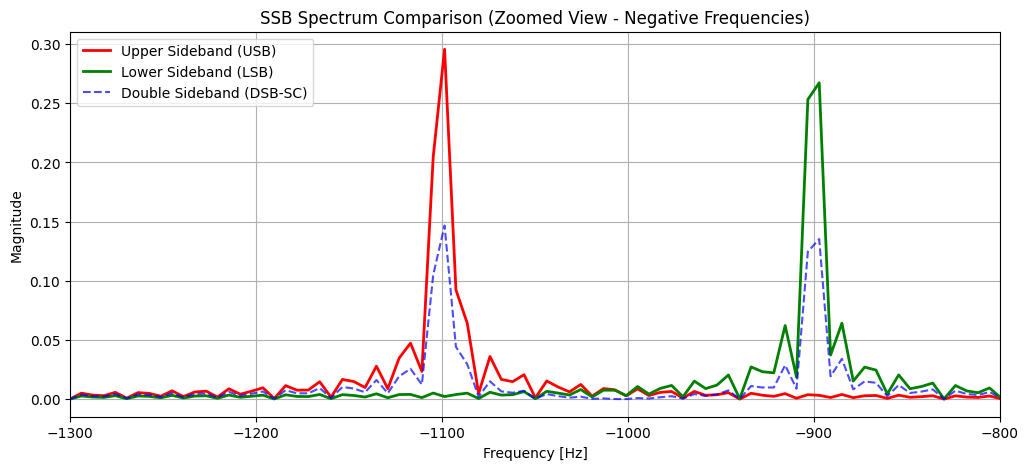

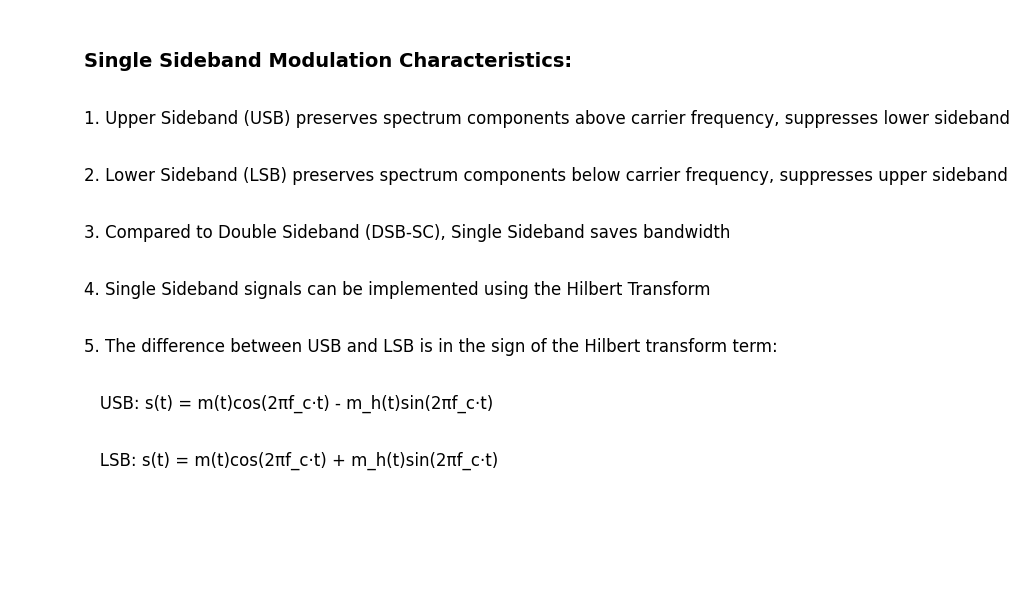

In [4]:
# Creating more visible comparison of SSB signals
from scipy.signal import hilbert

# Generate standard single-sideband signals (USB and LSB)
m_h_t = np.imag(hilbert(m_t))  # Hilbert transform

# Upper sideband signal (USB)
s_ssb_usb = m_t * np.cos(2 * np.pi * fc * t) - m_h_t * np.sin(2 * np.pi * fc * t)

# Lower sideband signal (LSB)
s_ssb_lsb = m_t * np.cos(2 * np.pi * fc * t) + m_h_t * np.sin(2 * np.pi * fc * t)

# Frequency domain analysis
freq_usb, mag_usb = compute_fft(s_ssb_usb, fs)
freq_lsb, mag_lsb = compute_fft(s_ssb_lsb, fs)
freq_dsb, mag_dsb = compute_fft(s_dsb, fs)  # Double sideband for comparison

# Enhanced visualization of signal characteristics
plt.figure(figsize=(14, 10))

# Time domain plots
plt.subplot(2, 1, 1)
plt.plot(t[:int(0.015*fs)], s_ssb_usb[:int(0.015*fs)], label='Upper Sideband (USB)')
plt.plot(t[:int(0.015*fs)], s_ssb_lsb[:int(0.015*fs)], label='Lower Sideband (LSB)')
plt.plot(t[:int(0.015*fs)], s_dsb[:int(0.015*fs)], '--', alpha=0.5, label='Double Sideband (DSB-SC)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('SSB Modulation - Time Domain Comparison (first 15ms)')
plt.grid(True)
plt.legend()

# Frequency domain plots - using lines instead of stem for clearer spectrum
plt.subplot(2, 1, 2)
plt.plot(freq_usb, mag_usb, label='Upper Sideband (USB)', linewidth=1.5)
plt.plot(freq_lsb, mag_lsb, label='Lower Sideband (LSB)', linewidth=1.5)
plt.plot(freq_dsb, mag_dsb, '--', alpha=0.5, label='Double Sideband (DSB-SC)')
plt.xlim(-1500, 1500)  # Focus around the carrier frequency
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('SSB Modulation - Frequency Domain Comparison')
plt.grid(True)
plt.legend()

# Zoomed frequency domain plot - focusing on positive frequencies
plt.figure(figsize=(12, 5))
plt.plot(freq_usb, mag_usb, 'r', label='Upper Sideband (USB)', linewidth=2)
plt.plot(freq_lsb, mag_lsb, 'g', label='Lower Sideband (LSB)', linewidth=2)
plt.plot(freq_dsb, mag_dsb, 'b--', alpha=0.7, label='Double Sideband (DSB-SC)')
plt.xlim(800, 1300)  # Only focusing on spectrum near carrier frequency fc=1000Hz
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('SSB Spectrum Comparison (Zoomed View - Positive Frequencies)')
plt.grid(True)
plt.legend()

# Similarly zoomed view for negative frequencies
plt.figure(figsize=(12, 5))
plt.plot(freq_usb, mag_usb, 'r', label='Upper Sideband (USB)', linewidth=2)
plt.plot(freq_lsb, mag_lsb, 'g', label='Lower Sideband (LSB)', linewidth=2)
plt.plot(freq_dsb, mag_dsb, 'b--', alpha=0.7, label='Double Sideband (DSB-SC)')
plt.xlim(-1300, -800)  # Only focusing on spectrum near -fc
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('SSB Spectrum Comparison (Zoomed View - Negative Frequencies)')
plt.grid(True)
plt.legend()

# Adding explanatory notes about SSB characteristics
plt.figure(figsize=(10, 6))
plt.text(0.1, 0.9, 'Single Sideband Modulation Characteristics:', fontsize=14, weight='bold')
plt.text(0.1, 0.8, '1. Upper Sideband (USB) preserves spectrum components above carrier frequency, suppresses lower sideband', fontsize=12)
plt.text(0.1, 0.7, '2. Lower Sideband (LSB) preserves spectrum components below carrier frequency, suppresses upper sideband', fontsize=12)
plt.text(0.1, 0.6, '3. Compared to Double Sideband (DSB-SC), Single Sideband saves bandwidth', fontsize=12)
plt.text(0.1, 0.5, '4. Single Sideband signals can be implemented using the Hilbert Transform', fontsize=12)
plt.text(0.1, 0.4, '5. The difference between USB and LSB is in the sign of the Hilbert transform term:', fontsize=12)
plt.text(0.1, 0.3, '   USB: s(t) = m(t)cos(2πf_c·t) - m_h(t)sin(2πf_c·t)', fontsize=12)
plt.text(0.1, 0.2, '   LSB: s(t) = m(t)cos(2πf_c·t) + m_h(t)sin(2πf_c·t)', fontsize=12)
plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

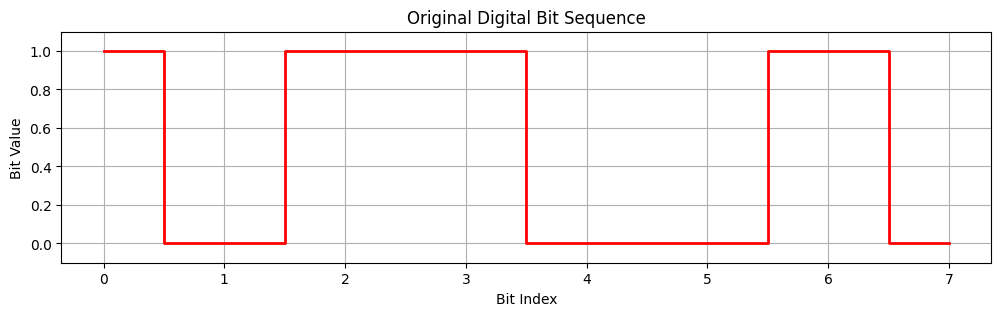

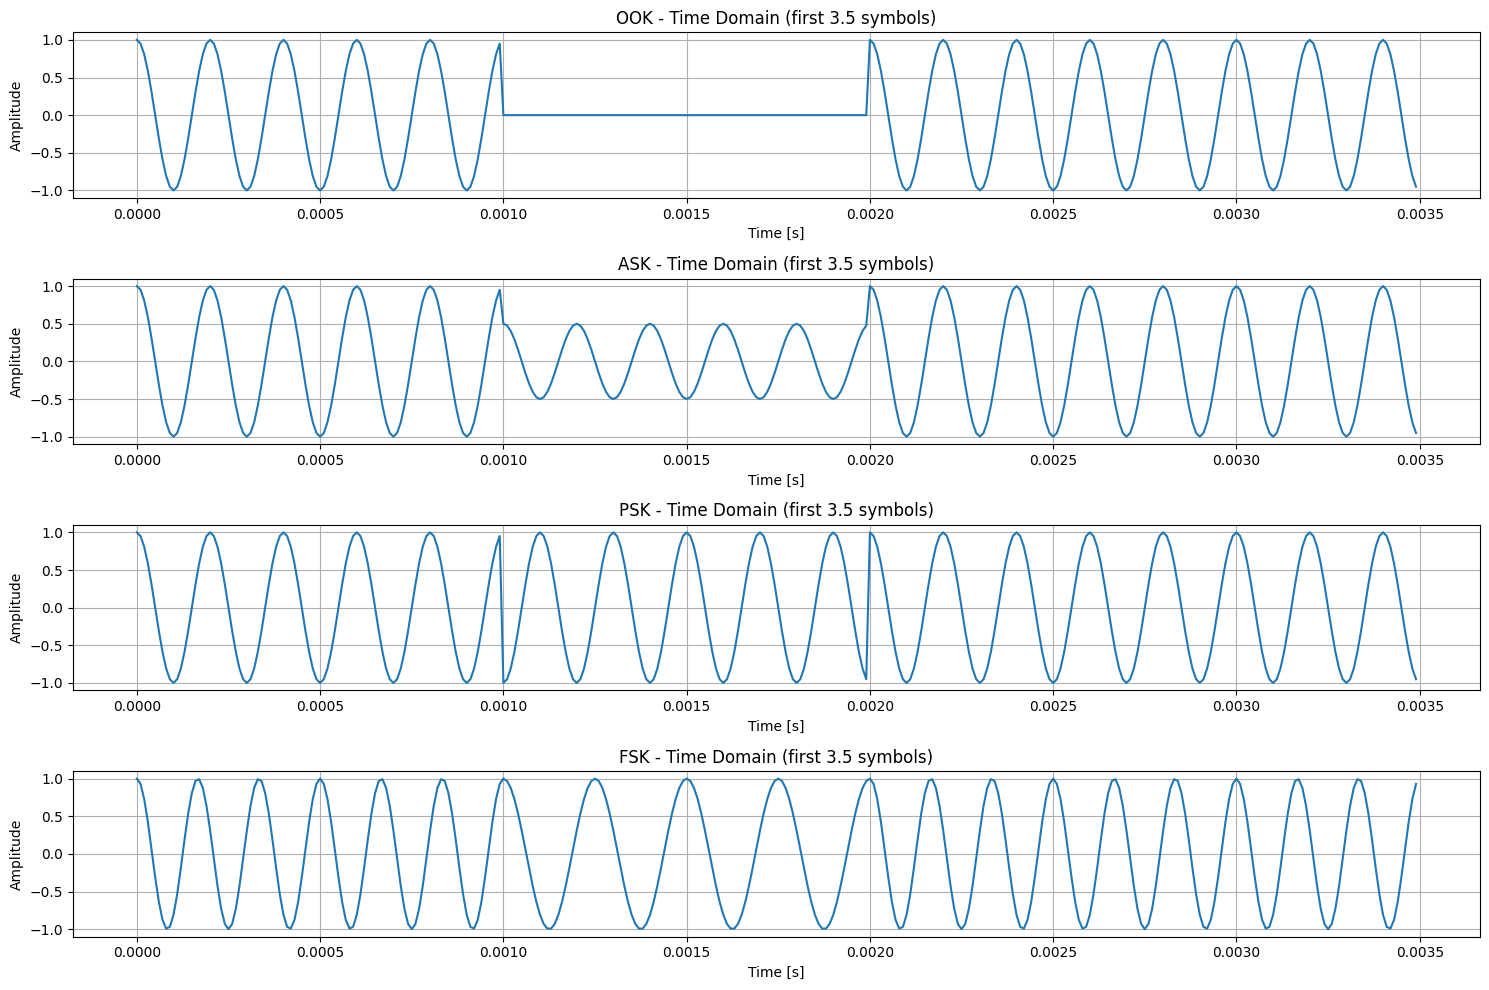

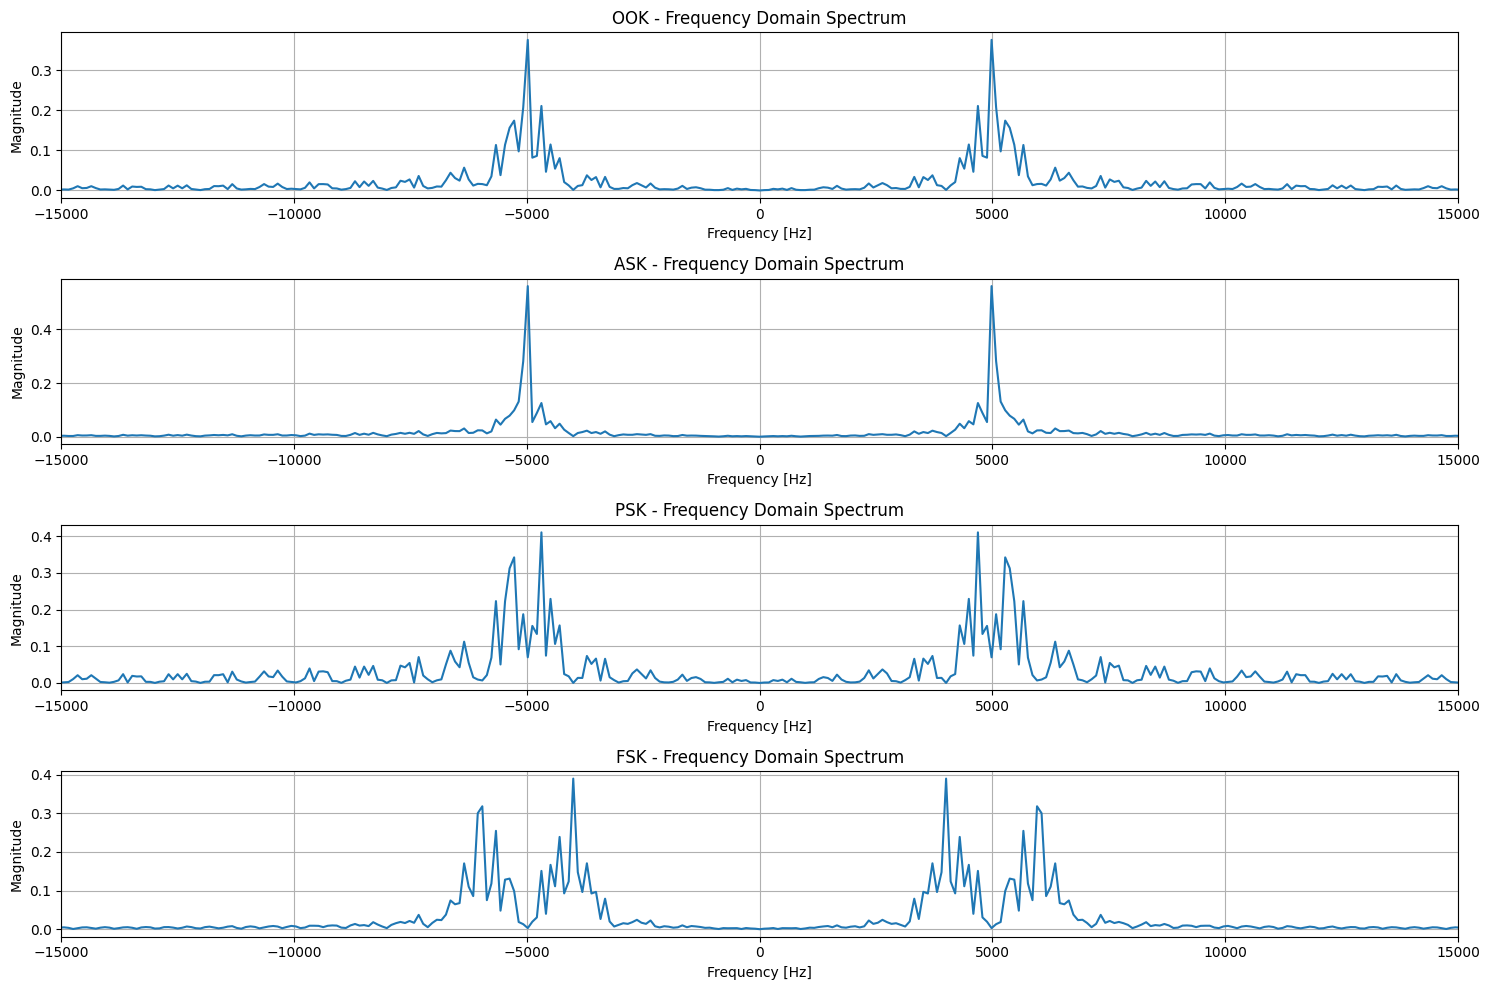

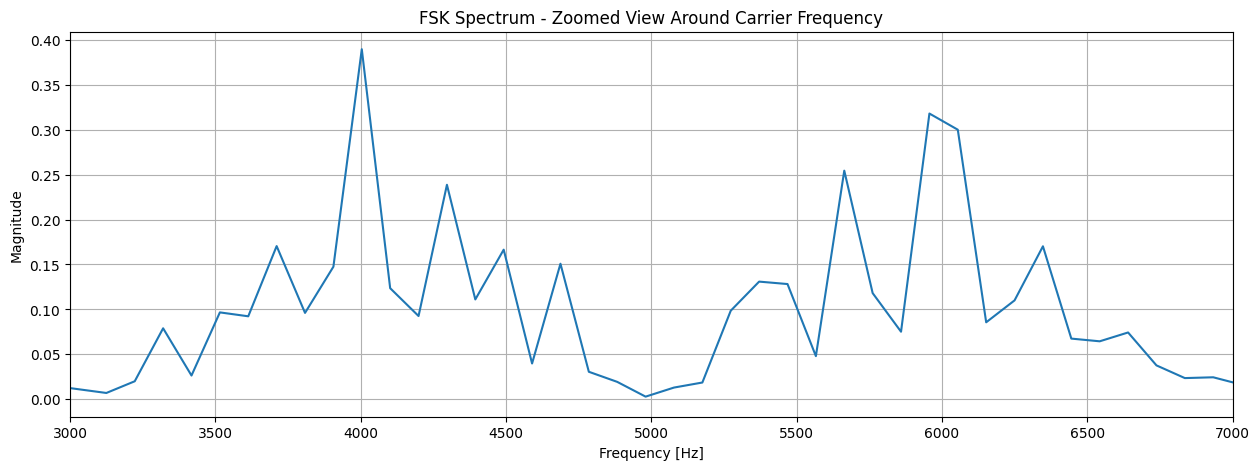

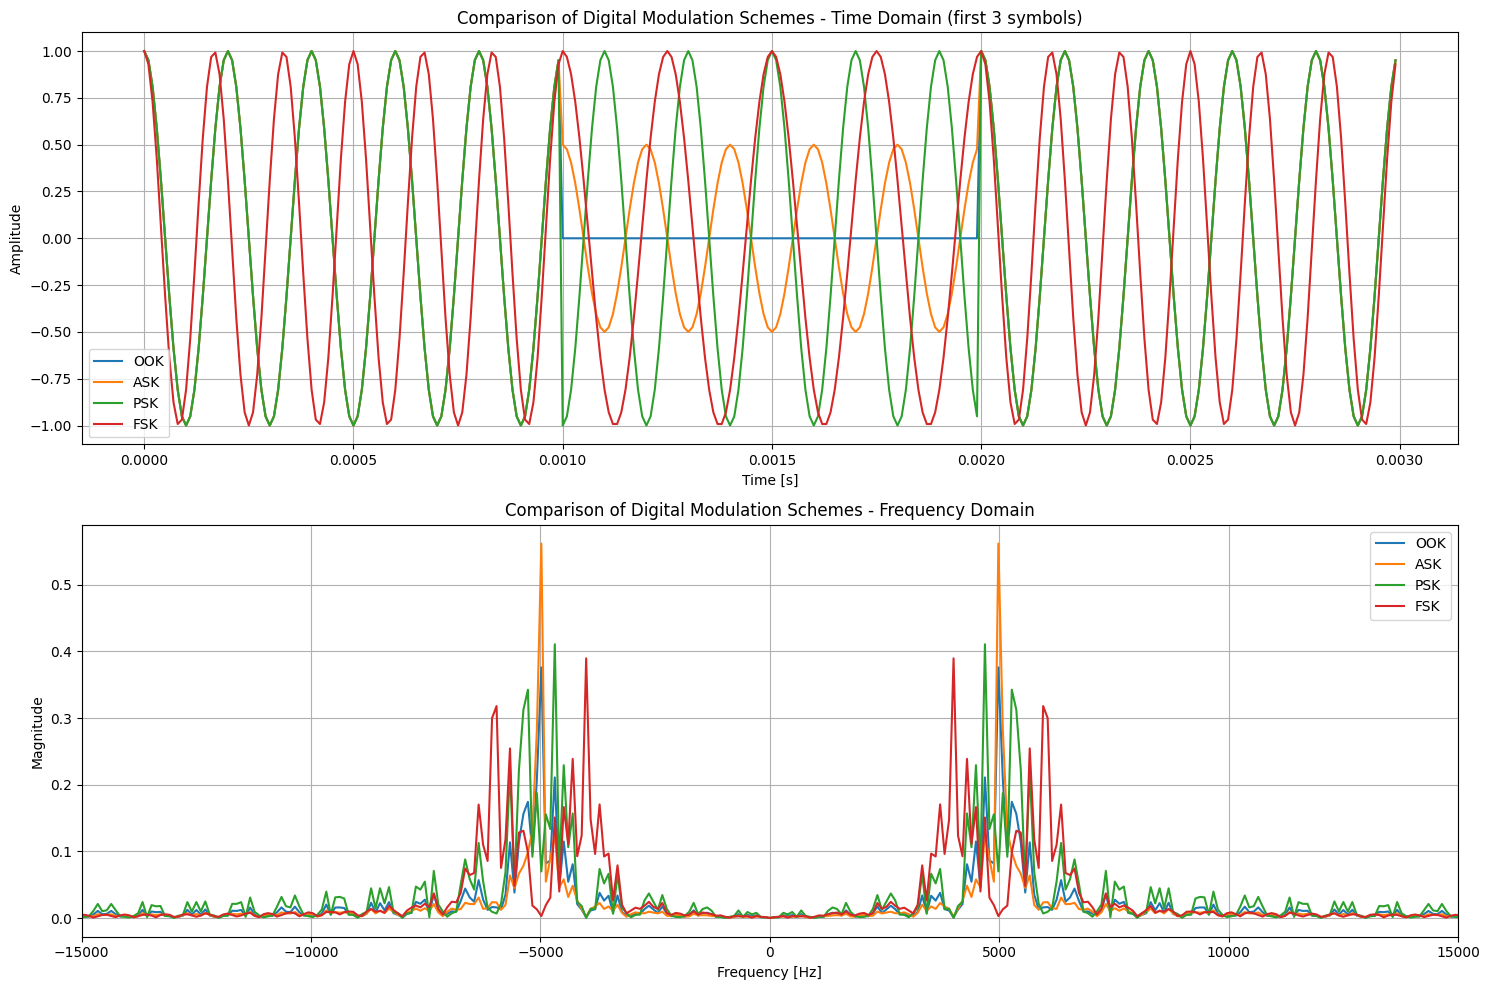

In [5]:
# Visualizing digital modulation schemes: OOK, ASK, PSK, FSK
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 100000          # 100 kHz sampling frequency
T_sym = 0.001        # Symbol duration: 1 ms
fc = 5000            # 5 kHz carrier frequency
t_sym = np.arange(0, T_sym, 1/fs)  # Time axis for one symbol

# Digital data (bit sequence)
bits = np.array([1, 0, 1, 1, 0, 0, 1, 0])
N_bits = len(bits)

# Generate time axis for the entire signal
t = np.arange(0, N_bits*T_sym, 1/fs)

# Generate carrier signal
carrier = np.cos(2*np.pi*fc*t)

# Create modulated signals
# 1. OOK (On-Off Keying)
ook_signal = np.zeros_like(t)
for i in range(N_bits):
    if bits[i] == 1:
        idx = np.arange(i*len(t_sym), (i+1)*len(t_sym))
        if idx[-1] < len(t):
            ook_signal[idx] = np.cos(2*np.pi*fc*t[idx])

# 2. ASK (Amplitude Shift Keying) - using two amplitude levels
ask_signal = np.zeros_like(t)
for i in range(N_bits):
    idx = np.arange(i*len(t_sym), (i+1)*len(t_sym))
    if idx[-1] < len(t):
        if bits[i] == 1:
            ask_signal[idx] = 1.0 * np.cos(2*np.pi*fc*t[idx])
        else:
            ask_signal[idx] = 0.5 * np.cos(2*np.pi*fc*t[idx])

# 3. PSK (Phase Shift Keying)
psk_signal = np.zeros_like(t)
for i in range(N_bits):
    idx = np.arange(i*len(t_sym), (i+1)*len(t_sym))
    if idx[-1] < len(t):
        if bits[i] == 1:
            psk_signal[idx] = np.cos(2*np.pi*fc*t[idx])
        else:
            psk_signal[idx] = -np.cos(2*np.pi*fc*t[idx])  # 180° phase shift

# 4. FSK (Frequency Shift Keying)
f1 = fc - 1000  # Lower frequency (4 kHz)
f2 = fc + 1000  # Higher frequency (6 kHz)
fsk_signal = np.zeros_like(t)
for i in range(N_bits):
    idx = np.arange(i*len(t_sym), (i+1)*len(t_sym))
    if idx[-1] < len(t):
        if bits[i] == 1:
            fsk_signal[idx] = np.cos(2*np.pi*f2*t[idx])
        else:
            fsk_signal[idx] = np.cos(2*np.pi*f1*t[idx])

# Compute FFT for each signal
def compute_fft_for_modulation(signal, fs):
    # zero-pad to next power of two for nicer display
    N = int(2 ** np.ceil(np.log2(len(signal))))
    fft_vals = np.fft.fft(signal, n=N)
    fft_freq = np.fft.fftfreq(N, 1/fs)
    fft_shifted = np.fft.fftshift(fft_vals)
    freq_shifted = np.fft.fftshift(fft_freq)
    magnitude = np.abs(fft_shifted) / (N/2)
    return freq_shifted, magnitude

# Compute FFT for each modulation scheme
freq_ook, mag_ook = compute_fft_for_modulation(ook_signal, fs)
freq_ask, mag_ask = compute_fft_for_modulation(ask_signal, fs)
freq_psk, mag_psk = compute_fft_for_modulation(psk_signal, fs)
freq_fsk, mag_fsk = compute_fft_for_modulation(fsk_signal, fs)

# Plot bit sequence
plt.figure(figsize=(12, 3))
plt.step(np.arange(N_bits), bits, 'r-', where='mid', linewidth=2)
plt.xlabel('Bit Index')
plt.ylabel('Bit Value')
plt.title('Original Digital Bit Sequence')
plt.grid(True)
plt.ylim([-0.1, 1.1])
plt.xticks(np.arange(N_bits))

# Create time and frequency domain plots for each modulation
techniques = ['OOK', 'ASK', 'PSK', 'FSK']
signals = [ook_signal, ask_signal, psk_signal, fsk_signal]
frequencies = [freq_ook, freq_ask, freq_psk, freq_fsk]
magnitudes = [mag_ook, mag_ask, mag_psk, mag_fsk]

# Time domain plots
plt.figure(figsize=(15, 10))
for i, (signal, technique) in enumerate(zip(signals, techniques)):
    plt.subplot(4, 1, i+1)
    plt.plot(t[:int(3.5*len(t_sym))], signal[:int(3.5*len(t_sym))])
    plt.title(f'{technique} - Time Domain (first 3.5 symbols)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
plt.tight_layout()

# Frequency domain plots
plt.figure(figsize=(15, 10))
for i, (freq, mag, technique) in enumerate(zip(frequencies, magnitudes, techniques)):
    plt.subplot(4, 1, i+1)
    plt.plot(freq, mag)
    plt.xlim(-15000, 15000)  # Focus on the relevant frequency range
    plt.title(f'{technique} - Frequency Domain Spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
plt.tight_layout()

# Zoomed frequency domain plots for FSK
plt.figure(figsize=(15, 5))
plt.plot(freq_fsk, mag_fsk)
plt.xlim(fc-2000, fc+2000)  # Zoom in around the carrier frequency
plt.title('FSK Spectrum - Zoomed View Around Carrier Frequency')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

# Comparison of all modulation techniques in one plot
plt.figure(figsize=(15, 10))

# Time domain comparison
plt.subplot(2, 1, 1)
for signal, technique in zip(signals, techniques):
    plt.plot(t[:int(3*len(t_sym))], signal[:int(3*len(t_sym))], label=technique)
plt.title('Comparison of Digital Modulation Schemes - Time Domain (first 3 symbols)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Frequency domain comparison
plt.subplot(2, 1, 2)
for freq, mag, technique in zip(frequencies, magnitudes, techniques):
    plt.plot(freq, mag, label=technique)
plt.xlim(-15000, 15000)
plt.title('Comparison of Digital Modulation Schemes - Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()